# Basic and Brief code suited for Text processing

In this very short notebook, the aim is to experiment and determine whether text processing such as tokenisation , stop word processing etc. can be applied at a larger scale

We begin by importing some of the needed packages:

In [1]:
#importing wanted libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

Here we read in the 'Comments' Dataset and work with only subset of the data


In [ ]:
comments = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ASSIGNMENT 2/data/C4Comments.xlsx")
comments.head(n=10)

,Comment_ID,course_id,Timestamp,user,Question_ID,Comment
0,7197674,21320,2020-04-30 19:57:28,635978,4470201,"This is a good question, i do think it's a lit..."
1,7197679,21320,2020-04-30 20:00:46,635978,4468999,"This is a really good question, i like the str..."
2,7199285,21320,2020-05-01 15:43:35,636026,4471345,It is a good question. Slightly tricky but not...
3,7202419,21320,2020-05-03 13:28:57,635990,4472540,I think this is a really good question! I thin...
4,7202425,21320,2020-05-03 13:34:57,635990,4472481,This question requires the students to recall ...
5,7202447,21320,2020-05-03 13:52:47,635990,4472418,This question requires quite specific and deta...
6,7202548,21320,2020-05-03 16:38:30,636007,4468332,I think this question was quite good. The ques...
7,7204388,21320,2020-05-04 16:43:37,636020,4468400,I like the style of this question in having to...
8,7204405,21320,2020-05-04 16:54:47,636020,4469950,I think this question would benefit from rewor...
9,7205230,21320,2020-05-05 00:09:07,635993,4475427,"This question is very easy, while it is very r..."


### Key observations:

From this brief snapshot we can observe a couple of things:
- the respective `Comment_ID`
- the `course_id` and `Timestamp` variables (not pertinent to this current analysis)
- The corresponding `Question_Id` 
- The most pertinent column: `Comment`


- In the comments column we can straight away observe that there are a few "stop words" we can immediately clean up such as:
  - I, is, a, the, to
  - 'Question', think, having

- The words of interest could possibly be:
  - easy, hard, good ,bad, tricky
  - recall
  - **Actionable words**:
    - benefit, rewording, misleading, confusing, difficult
    - suggest


- We will also need to find the root words/ words that have similiar meaning to eachother

In [ ]:
comments['Comment'].head(n=30)

0     This is a good question, i do think it's a lit...
1     This is a really good question, i like the str...
2     It is a good question. Slightly tricky but not...
3     I think this is a really good question! I thin...
4     This question requires the students to recall ...
5     This question requires quite specific and deta...
6     I think this question was quite good. The ques...
7     I like the style of this question in having to...
8     I think this question would benefit from rewor...
9     This question is very easy, while it is very r...
10    I liked this question, however i was unsure of...
11    This question is good but only tests basic rec...
12    The question was straight-forward and requires...
13    The question has plausible options that are wo...
14    The question was a bit difficult, which is goo...
15    It would be really helpful if you further expl...
16    I think option C is quite misleading; I chose ...
17    I think this question is worded a bit conf

## Preliminary text transformation

Here I will cast each row in the `comments['Comment]` column to a string as a pre-step to tokenisation.

In [ ]:
# Convert to list
comments_ls = comments['Comment'].tolist()

# viewing an example:
comments_ls[100]



'When reading this question I got too distracted by reading the table options an trying to figure out which columns are correct and incorrect that I forgot to read the actual question again. Whoops!! Now that I read the question again the correct answer makes sense and is quite easy to identify through process of elimination of the other answers. This question requires students to apply their knowledge in a situation where the sigma subunit is impaired. The fact that you said "impaired" rather than not present at all makes the question more challenging. The transcription occurs (Yes/No) column could be a bit confusing but also allows the elimination of A and D as students that are confident with the syllabu content will know that the sigma subunit is involved in the initiation of prokaryotic transcription. This question could be changed into a "Which row of the table is True/False?" question or something along those lines which is similar to the style of exam questions.'

### Key Observations:
From this example we can observe the following things, the author of this particular comment has implemented:
- brackets/ parentheses ()
- Quotation marks " " , this also differs comment to comment- some are enclosed by ' ' and others " "
- Punctuation marks like commas, fullstops, exclamation points, question marks
- There are a few spelling errors
- These comments are quite long and dense 
- Important words to consider are:
  "distracted"
  "confusing"
- Distinction needs to be made between answer options (A, B, C, D) and stop words/ words at the beginning of the sentence like 'a' and 'A' if capitalised

# Next Steps

The next steps would be to build or find functions where we tokenise the most valuable words - that relate to the aims of the core.

As well as remove any noise from the text- punctuation, latex or HTML formatting.

Then assign some statistical weighting to these words.



# Joining Comments to Groups

Joining the comments data set to the Groups data set.

In [2]:
comments = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ASSIGNMENT 2/data/C4Comments.xlsx")
groups =  pd.read_excel("/content/drive/My Drive/Colab Notebooks/ASSIGNMENT 2/data/C4UsersCourses.xlsx")

In [ ]:
groups

In [ ]:
comments

In [ ]:
comments.dtypes
groups.dtypes

user          int64
course_id     int64
Team         object
dtype: object

In [4]:
# joining the 2 data sets togeher
#users_qs= questions[['course_id','id','user', 'avg_rating', 'total_responses', 'total_comments']].merge(users, how="inner", on="user")

#users_qs

#combined data sets
comments_gps = comments[['Comment_ID', 'Question_ID','user', 'course_id', 'Comment']].merge(groups, how= "inner", on =['user', 'course_id'])
comments_gps

,Comment_ID,Question_ID,user,course_id,Comment,Team
0,7197674,4470201,635978,21320,"This is a good question, i do think it's a lit...",Pink
1,7197679,4468999,635978,21320,"This is a really good question, i like the str...",Pink
2,7206418,4475078,635978,21320,The style of the question is really good but t...,Pink
3,7206422,4470355,635978,21320,I think this is a good question but you should...,Pink
4,7211664,4476565,635978,21320,This is a great question but i do think making...,Pink
...,...,...,...,...,...,...
2071,7227407,4487352,637299,21328,This is a great question because it addresses ...,Yellow
2072,7227423,4484168,637299,21328,I think that this is a great question. It effe...,Yellow
2073,7227427,4479408,637299,21328,I found the question to be rather wordy and ju...,Yellow
2074,7227428,4476987,637299,21328,The question is well done and presents to be c...,Yellow


## Stop Word Removal - RUN BEFORE TOKENISATIOn

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#print(stopwords.words('english'))
stopwords.words('english')
# transferring stop words to my own list

ls = []

for word in stopwords.words('english'):
  ls.append(word)
ls

# new stop words list to be added to ls

#ls

stop = ['think', 'good', 'bad', 'tricky', 'easy', 'question', 'like', 'would', 'could', 'well', 'really', 'great']

for word in stop:
  ls.append(word)

stop_words = ls
stop_words

## Tokenisation

In [ ]:
#Convert comments to a big continuous string
comments_corpus = comments_gps['Comment'].tolist()

comments_corpus

In [9]:
# vectorising and making tokens using CountVectoriser()

vectorise = CountVectorizer(lowercase= True, stop_words= stop_words)
X= vectorise.fit_transform(comments_corpus)

In [10]:
# FEATURE NAMES

print(vectorise.get_feature_names())
#print(X.shape)


['000', '000nt', '07', '10', '100', '10000', '1093', '10nt', '11', '12', '12290', '15', '150', '16s', '18', '18s', '1st', '20110803100335437', '25', '250', '25nm', '25nt', '25s', '27', '28', '28s', '2nd', '30', '300', '30bp', '32', '35', '383727', '383939', '383941', '384002', '384042', '384163', '384542', '3rd', '40', '429947', '45s', '4th', '50', '50s', '5s', '5th', '60', '64', '65281', '65292', '6s', '70', '700bp', '70s', '85s', '8s', '8th', '__', '___', '____', '_____', '______', '____d____', '___a___', '___b___', '___c___to', 'aa', 'abbreviations', 'abbriviation', 'abcd', 'aberrant', 'abherrent', 'abilities', 'ability', 'abit', 'able', 'abled', 'abnormal', 'aboutcodon', 'aboutinitiators', 'aboutpolycistronic', 'abouttranscription', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbed', 'abstract', 'abundant', 'academically', 'accelerate', 'accept', 'access', 'accessible', 'accidental', 'accidentally', 'accompanied', 'accompaniment', 'accompany', 'accompanying', 'acco

In [11]:
print('Feature names:\n', vectorise.get_feature_names())

Feature names:
 ['000', '000nt', '07', '10', '100', '10000', '1093', '10nt', '11', '12', '12290', '15', '150', '16s', '18', '18s', '1st', '20110803100335437', '25', '250', '25nm', '25nt', '25s', '27', '28', '28s', '2nd', '30', '300', '30bp', '32', '35', '383727', '383939', '383941', '384002', '384042', '384163', '384542', '3rd', '40', '429947', '45s', '4th', '50', '50s', '5s', '5th', '60', '64', '65281', '65292', '6s', '70', '700bp', '70s', '85s', '8s', '8th', '__', '___', '____', '_____', '______', '____d____', '___a___', '___b___', '___c___to', 'aa', 'abbreviations', 'abbriviation', 'abcd', 'aberrant', 'abherrent', 'abilities', 'ability', 'abit', 'able', 'abled', 'abnormal', 'aboutcodon', 'aboutinitiators', 'aboutpolycistronic', 'abouttranscription', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbed', 'abstract', 'abundant', 'academically', 'accelerate', 'accept', 'access', 'accessible', 'accidental', 'accidentally', 'accompanied', 'accompaniment', 'accompany', 'acco

## Stemming 

In [12]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [13]:
#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [ ]:
# pass a list as input
vectorise.get_feature_names()
# for loop

for word in vectorise.get_feature_names():
    print("{0:20}{1:30}{2:30}".format(word,porter.stem(word),lancaster.stem(word)))

In [15]:
stemmed_ls = []
for word in vectorise.get_feature_names():
    stemmed_ls.append(porter.stem(word))

In [ ]:
stemmed_ls

# Clustering 

### This cluster analysis is without the stemmed words

- Applying TF-IDF 

 short for term frequency inverse document frequency, which is a numerical statistic that's intended to reflect how important a word is to a document in a corpus by giving each word in a document a score that ranges from 0 to 1.

In [21]:

tf_vect = TfidfVectorizer(stop_words= stop_words, tokenizer= LemmaTokenizer)
Y = tf_vect.fit_transform(comments_corpus)
print(Y)

NameError: ignored

In [ ]:
tf_idf = pd.DataFrame(data = Y.toarray(), columns=tf_vect.get_feature_names())
tf_idf

In [ ]:
# dont know wtf is going on here- IGNORE

#final_df = tf_idf
#print("{} rows".format(final_df.shape[0]))
# first 15 words with the highest weight on the 0th Document
#final_df.T.nlargest(15, 0)


In [ ]:
final_df = tf_idf
final_df.head()

In [19]:
K = 5
model = KMeans(n_clusters= K, init='k-means++', max_iter=100, n_init=1, random_state=345)
model.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=345, tol=0.0001, verbose=0)

In [20]:
# code from : https://pythonprogramminglanguage.com/kmeans-text-clustering/
# accessed 7th Nov 2020
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = Z = tf_vect.get_feature_names()
for i in range(K):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 rna
 promoter
 li
 sequences
 pol
 enhancer
 sequence
 dna
 strand
 box
Cluster 1:
 options
 option
 explanation
 clear
 answer
 bit
 make
 also
 correct
 quite
Cluster 2:
 transcription
 prokaryotic
 eukaryotic
 factors
 understanding
 translation
 options
 knowledge
 explanation
 option
Cluster 3:
 knowledge
 students
 requires
 understanding
 recall
 information
 however
 explanation
 student
 simple
Cluster 4:
 answers
 answer
 correct
 make
 explanation
 also
 understand
 students
 one
 clear


In [ ]:
model.labels_
kmeans_labels = model.labels_
comments_gps['kmeans_labels']= kmeans_labels
comments_gps

,Comment_ID,Question_ID,user,course_id,Comment,Team,kmeans_labels
0,7197674,4470201,635978,21320,"This is a good question, i do think it's a lit...",Pink,4
1,7197679,4468999,635978,21320,"This is a really good question, i like the str...",Pink,1
2,7206418,4475078,635978,21320,The style of the question is really good but t...,Pink,4
3,7206422,4470355,635978,21320,I think this is a good question but you should...,Pink,4
4,7211664,4476565,635978,21320,This is a great question but i do think making...,Pink,1
...,...,...,...,...,...,...,...
2071,7227407,4487352,637299,21328,This is a great question because it addresses ...,Yellow,3
2072,7227423,4484168,637299,21328,I think that this is a great question. It effe...,Yellow,3
2073,7227427,4479408,637299,21328,I found the question to be rather wordy and ju...,Yellow,3
2074,7227428,4476987,637299,21328,The question is well done and presents to be c...,Yellow,4


### Joining this data set to the questions data set

- keeping columns like:
- rating
- academic mark

# Kmeans - with stemmed words

# Natural Language Processing - data 2001 IGNORE



In [ ]:
from spacy.lang.en import English
parser = English()

# Our text data from Ch1 of Alice in Wonderland
alice = """
Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do. Once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, "and what is the use of a book," thought Alice, "without pictures or
conversations?"

So she was considering in her own mind (as well as she could, for the
day made her feel very sleepy and stupid), whether the pleasure of
making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so very remarkable in that, nor did Alice think it so
very much out of the way to hear the Rabbit say to itself, "Oh dear! Oh
dear! I shall be too late!" But when the Rabbit actually took a watch
out of its waistcoat-pocket and looked at it and then hurried on, Alice
started to her feet, for it flashed across her mind that she had never
before seen a rabbit with either a waistcoat-pocket, or a watch to take
out of it, and, burning with curiosity, she ran across the field after
it and was just in time to see it pop down a large rabbit-hole, under
the hedge. In another moment, down went Alice after it!
"""

# Run the parser


In [ ]:
parser.add_pipe(parser.create_pipe('sentencizer'))     # for latest spacy 2.0.x, sentencizer needs to be added.
parsedData = parser(alice)

In [ ]:
parsedData

In [ ]:
sentences = list(parsedData.sents)
for i, s in enumerate(sentences):
    tokens = [t.text for t in s if t.text.strip()]
    print(i, ' '.join(tokens))

In [ ]:
print('-'*79)
print('{:<15} {:<15} {:<15} {:<15} {:<15}'.format('TOKEN', 'LEMMA', 'POS', 'ENTITY', 'DEPENDENCY'))
print('-'*79)
for token in sentences[0]:
    if token.text.strip():
        ent_tag = token.ent_iob_
        if token.ent_type_:
            ent_tag = '{}-{}'.format(token.ent_iob_, token.ent_type_)
        dep_rel = token.dep_
        if token.dep_ != 'ROOT':
            dep_rel = '{}::{}'.format(token.dep_, token.head.text)
        print('{:<15} {:<15} {:<15} {:<15} {:<15}'.format(token.text, token.lemma_, token.pos_, ent_tag, dep_rel))
print('-'*79)

-------------------------------------------------------------------------------
TOKEN           LEMMA           POS             ENTITY          DEPENDENCY     
-------------------------------------------------------------------------------
Alice           Alice                                           ::Alice        
was             was                                             ::was          
beginning       beginning                                       ::beginning    
to              to                                              ::to           
get             get                                             ::get          
very            very                                            ::very         
tired           tired                                           ::tired        
of              of                                              ::of           
sitting         sitting                                         ::sitting      
by              by                      

## Noise Removal

## CHARLIE'S CODE - DONT RUN 

In [ ]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(comments_gps['Comment'].values)
features = vec.transform(comments_gps['Comment'].values)
print(features)

In [ ]:

km = MiniBatchKMeans(n_clusters=3, random_state=0)
km.fit(features)

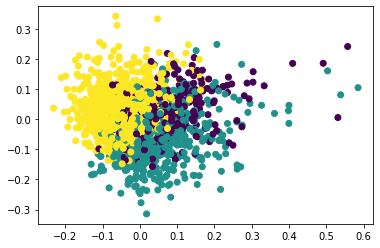

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt 

pca = PCA(n_components=2, random_state=0)
lowerdim_features = pca.fit_transform(features.toarray())

reduced_centers = pca.transform(km.cluster_centers_)
plt.scatter(lowerdim_features[:,0], lowerdim_features[:,1], c=km.predict(features))